In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)
%cd /content/gdrive/MyDrive/ls-190colab/cap-examples
%ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/ls-190colab/cap-examples
api_text_search/          get_judges/             python_wrapper/
api_to_csv/               introduction/           README.md
api_tutorial_downloader/  labelling_summarizing/  requirements.in
bulk_exploration/         LICENSE                 requirements.txt
bulk_extract/             logs.log                sample_text.txt
config/                   map_courts/             settings.py
d2v-vectors.pkl           m.model                 tests/
data/                     m.vocab                 utils.py
fabfile.py                ngrams/                 w2v-vectors.pkl
full_text_search/         __pycache__/            X_tfidf.pkl


In [ ]:
!pip-compile --output-file=requirements.txt requirements.in

       |████████████████████████████████| 27.7 MB 1.6 MB/s 
       |████████████████████████████████| 63 kB 1.8 MB/s 
       |████████████████████████████████| 24.1 MB 1.2 MB/s 
       |████████████████████████████████| 11.3 MB 51.4 MB/s 
       |████████████████████████████████| 296 kB 30.5 MB/s 
       |████████████████████████████████| 133 kB 59.0 MB/s 
       |████████████████████████████████| 11.2 MB 48.3 MB/s 
       |████████████████████████████████| 292 kB 57.1 MB/s 
       |████████████████████████████████| 6.0 MB 44.8 MB/s 
       |████████████████████████████████| 76 kB 4.9 MB/s 
       |████████████████████████████████| 9.9 MB 46.5 MB/s 
       |████████████████████████████████| 92 kB 691 kB/s 
       |████████████████████████████████| 47 kB 4.6 MB/s 
       |████████████████████████████████| 428 kB 42.9 MB/s 
       |████████████████████████████████| 98 kB 7.2 MB/s 
       |████████████████████████████████| 61 kB 8.1 MB/s 
       |████████████████████████████████| 1.2 MB 5

In [ ]:
import os
import sys
sys.path.append('..')

import lzma
import json
import pandas as pd
import numpy as np

from config import settings_base as settings
import utils

In [ ]:
compressed_file = utils.get_cases_from_bulk(jurisdiction="Delaware", data_format="json")

downloading Delaware-20200302-text.zip into ../data dir


57900it [00:01, 29972.63it/s]


extracting Delaware-20200302-text.zip into ../data dir
Done.


In [ ]:
cases = []
print("File path:", compressed_file)
with lzma.open(compressed_file) as infile:
    for line in infile:
        record = json.loads(str(line, 'utf-8'))
        cases.append(record)

print("Case count: %s" % len(cases))

File path: /content/gdrive/MyDrive/ls-190colab/cap-examples/config/../data/Delaware-20200302-text/data/data.jsonl.xz
Case count: 16772


In [ ]:
df = pd.DataFrame(cases)
df.head()

,id,url,name,name_abbreviation,decision_date,docket_number,first_page,last_page,citations,volume,reporter,court,jurisdiction,frontend_url,preview,casebody
0,11737169,https://api.capapi.org/v1/cases/11737169/,In the Matter of Ronald L. CANTRELL for a Writ...,In re Cantrell,1996-07-01,"No. 258, 1996",525,526,"[{'type': 'official', 'cite': '678 A.2d 525'}]",{'url': 'https://api.capapi.org/v1/volumes/320...,{'url': 'https://api.capapi.org/v1/reporters/2...,{'url': 'https://api.capapi.org/v1/courts/del-...,"{'name': 'Del.', 'name_long': 'Delaware', 'whi...",https://cite.capapi.org/a2d/678/525/,[],"{'data': {'judges': ['Before WALSH, HOLLAND, a..."
1,11684804,https://api.capapi.org/v1/cases/11684804/,"Hendrik LIKET, Defendant Below, Appellant, v. ...",Liket v. State,1998-11-04,"No. 286, 1997",935,939-941,"[{'type': 'official', 'cite': '719 A.2d 935'}]",{'url': 'https://api.capapi.org/v1/volumes/320...,{'url': 'https://api.capapi.org/v1/reporters/2...,{'url': 'https://api.capapi.org/v1/courts/del-...,"{'name': 'Del.', 'name_long': 'Delaware', 'whi...",https://cite.capapi.org/a2d/719/935/,[],"{'data': {'judges': ['Before VEASEY, C.J., WAL..."
2,11684732,https://api.capapi.org/v1/cases/11684732/,"STATE of Delaware, Employer Below, Appellant, ...",State v. Steen,1998-10-22,"No. 57, 1998",930,935,"[{'type': 'official', 'cite': '719 A.2d 930'}]",{'url': 'https://api.capapi.org/v1/volumes/320...,{'url': 'https://api.capapi.org/v1/reporters/2...,{'url': 'https://api.capapi.org/v1/courts/del-...,"{'name': 'Del.', 'name_long': 'Delaware', 'whi...",https://cite.capapi.org/a2d/719/930/,[],"{'data': {'judges': ['Before VEASEY, C.J., WAL..."
3,11637715,https://api.capapi.org/v1/cases/11637715/,"Eric BARKLEY, Defendant Below, Appellant, v. S...",Barkley v. State,1999-02-19,"No. 116, 1998",558,561,"[{'type': 'official', 'cite': '724 A.2d 558'}]",{'url': 'https://api.capapi.org/v1/volumes/320...,{'url': 'https://api.capapi.org/v1/reporters/2...,{'url': 'https://api.capapi.org/v1/courts/del-...,"{'name': 'Del.', 'name_long': 'Delaware', 'whi...",https://cite.capapi.org/a2d/724/558/,[],"{'data': {'judges': ['Before VEASEY, C.J., WAL..."
4,11638241,https://api.capapi.org/v1/cases/11638241/,"S&R ASSOCIATES, L.P., III, a Limited Partnersh...","S&R Associates, L.P. v. Shell Oil Co.",1998-09-30,No. 94C-06-189-WTQ,431,440,"[{'type': 'official', 'cite': '725 A.2d 431'}]",{'url': 'https://api.capapi.org/v1/volumes/320...,{'url': 'https://api.capapi.org/v1/reporters/2...,{'url': 'https://api.capapi.org/v1/courts/del-...,"{'name': 'Del.', 'name_long': 'Delaware', 'whi...",https://cite.capapi.org/a2d/725/431/,[],"{'data': {'judges': [], 'attorneys': ['Stephan..."


In [ ]:
opinion_data = []
for case in cases:
    for opinion in case["casebody"]["data"]["opinions"]:
        temp = {}
        keys = list(case.keys())
        keys.remove('casebody')
        for key in keys:         
            temp[key] = case[key]
        keys = list(opinion.keys())
        for key in keys:         
            temp[key] = opinion[key]
        opinion_data.append(temp)
df = pd.DataFrame(opinion_data)
df["citations"] = df["citations"].apply(lambda x:x[0]['cite'])
df["court"] = df["court"].apply(lambda x:x['name'])
df["decision_date"] = df["decision_date"].apply(lambda x:int(x[:4]))
df["volume"] = df['volume'].apply(lambda x: x.get('url'))
df["reporter"] = df['reporter'].apply(lambda x: x.get('url'))
df["jurisdiction"] = df["jurisdiction"].apply(lambda x: x.get('name_long'))

In [ ]:
sample_df = df.sample(frac=0.01 , replace=False , random_state=1)

In [ ]:
####assuming "list_of_list" is already set up as a list of documents
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

# we create a "vocabulary list" which is a collection of every word present in all documents
case_vocab = []

for document in sample_df['text']:
  tokens = word_tokenize(document)
  case_vocab += tokens

# the text below ensures every word below is lowercase and that there are no repeats in case_vocab
for i in np.arange(len(case_vocab)):
  case_vocab[i] = case_vocab[i].lower()

case_vocab = list(set(case_vocab))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer

# # the CountVectorizer allows a collection of documents to be transformed to a series of
# # vectors which represent term frequency
# tf_vec = CountVectorizer(vocabulary= case_vocab, min_df = 0)

# df = pd.DataFrame(data = list_of_lists, columns=['document'])
# X_tf = tf_vec.fit_transform(df['document'].values)

# # tf represents the term frequency matrix
# tf = pd.DataFrame(data = X_tf.toarray(), columns = tf_vec.get_feature_names())

# tf

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# the CountVectorizer allows a collection of documents to be transformed to a series of
# vectors which represent term frequency
tf_vec = CountVectorizer(vocabulary= case_vocab, min_df = 0)

X_tf = tf_vec.fit_transform(np.array(sample_df['text']))

# # tf represents the term frequency matrix
tf = pd.DataFrame(data = X_tf.toarray(), columns = tf_vec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


 The **term frequency-inverse document frequency (TFIDF)** is used to analyze how important a term is. A term increases its TFIDF the more it shows up in a document, but decreases if the term is very prevalent in almost all documents (ex. stop words).

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vec = TfidfVectorizer(vocabulary= case_vocab, min_df = 0)

# df = pd.DataFrame(data = list_of_lists, columns=['document'])
# X_tfidf = tfidf_vec.fit_transform(df['document'].values)

# # tf represents the term frequency matrix
# tfidf = pd.DataFrame(data = X_tfidf.toarray(), columns = tfidf_vec.get_feature_names())

# tfidf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(vocabulary=case_vocab, min_df = 0)

X_tfidf = tfidf_vec.fit_transform(np.array(sample_df['text']))

# tf represents the term frequency matrix
tfidf = pd.DataFrame(data = X_tfidf.toarray(), columns = tfidf_vec.get_feature_names())

tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,graduates,2005,oc,quotes,856,difrancesco,dotson,light.,time-barred,names,...,logically,polk,deprives,cheap,throat,began,restrained,com/assets/uploads/2012/02/guidelines_,interest,"1,320,000.00"
0,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.006579,0.0
1,0.0,0.00000,0.0,0.0,0.013209,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.00000,0.0,0.0,0.000000,0.350002,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.00000,0.0,0.0,0.039466,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.024654,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
166,0.0,0.02187,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
167,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
168,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.006126,0.0,0.0,0.0,0.0,0.0,0.004817,0.0


Using both the *tf* and *tfidf* matrices, we can use the **cosine similarity** to take a look at how similar the documents are in terms of distributions of tokens. 

In [ ]:
# the cosine similarity measures similarity between rows of a matrix, which represent documents here
from sklearn.metrics.pairwise import cosine_similarity

sim_tf = cosine_similarity(X_tf[:100])
sim_tfidf = cosine_similarity(X_tfidf[:100])

sim_tf, sim_tfidf

(array([[1.        , 0.84524941, 0.80758229, ..., 0.83283849, 0.90863505,
         0.87491693],
        [0.84524941, 1.        , 0.76924288, ..., 0.83513139, 0.85677681,
         0.83828101],
        [0.80758229, 0.76924288, 1.        , ..., 0.78276846, 0.80824994,
         0.75845622],
        ...,
        [0.83283849, 0.83513139, 0.78276846, ..., 1.        , 0.84461413,
         0.81383908],
        [0.90863505, 0.85677681, 0.80824994, ..., 0.84461413, 1.        ,
         0.91000419],
        [0.87491693, 0.83828101, 0.75845622, ..., 0.81383908, 0.91000419,
         1.        ]]),
 array([[1.        , 0.48258791, 0.36341447, ..., 0.37592898, 0.58083555,
         0.52515297],
        [0.48258791, 1.        , 0.34714221, ..., 0.38745343, 0.53318189,
         0.49804113],
        [0.36341447, 0.34714221, 1.        , ..., 0.28717413, 0.4006934 ,
         0.35460067],
        ...,
        [0.37592898, 0.38745343, 0.28717413, ..., 1.        , 0.41900043,
         0.39828047],
        [0.5

How are *sim_tf* and *sim_tfidf* different? Does it have to with the *tf* and *tfidf* matrices?

## Part 2 a. - Word2Vec using Gensim
There's two ways of doing word2vec - gensim is more intuitive (aind simpler) so use that. Below is some example code I have. Again, use a corpus from case.law dataset. 

Documentation here is useful: https://radimrehurek.com/gensim/models/word2vec.html

Follow the "Gensim" part of this lab (not the keras one)
https://github.com/elliottash/nlp_lss_2022/blob/master/notebooks/06_word_embeddings.ipynb


In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# word2vec requires sentences as input
from nltk import sent_tokenize
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.corpus import stopwords
nltk.download('stopwords')
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input doc and return clean list of tokens"
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # all lower case
    nopunc = lower.translate(translator) # remove punctuation
    words = nopunc.split() # split into tokens
    nostop = [w for w in words if w not in stoplist] # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
    stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
    return stemmed

def get_sentences(doc):
    sent=[]
    for raw in sent_tokenize(doc):
        raw2 = normalize_text(raw)
        sent.append(raw2)
    return sent

sentences = []
for doc in sample_df['text']:
    sentences += get_sentences(doc)
from random import shuffle
shuffle(sentences) # stream in sentences in random order

# train the model
from gensim.models import Word2Vec
w2v = Word2Vec(sentences,  # list of tokenized sentences
               workers = 8, # Number of threads to run in parallel
               size=300,  # Word vector dimensionality     
               min_count =  25, # Minimum word count  
               window = 5, # Context window size      
               sample = 1e-3, # Downsample setting for frequent words
               )

# done training, so delete context vectors
w2v.init_sims(replace=True)

w2v.save('w2v-vectors.pkl')

w2v.wv['judg'] # vector for "judge"

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array([ 0.03212729,  0.02715642, -0.07903136, -0.01751863, -0.07543752,
        0.09373906,  0.01136764, -0.00427538,  0.00210039,  0.08075459,
       -0.04705181,  0.00950204,  0.02299551,  0.05810056,  0.10755459,
        0.07884566, -0.01872381, -0.00084407,  0.05617075, -0.01695734,
        0.04478395,  0.09938297,  0.02333609, -0.05449938,  0.02438537,
       -0.00365009,  0.04212995, -0.00727689, -0.05347706, -0.0585669 ,
       -0.02013947, -0.03366998, -0.01216193,  0.0019083 , -0.01694447,
        0.03674655,  0.0050893 ,  0.01983734, -0.04303687, -0.03740215,
       -0.01223405, -0.00945664, -0.09204612,  0.02896395,  0.02813449,
       -0.06288303,  0.09057454, -0.05572012,  0.02820829, -0.1163231 ,
        0.04047947,  0.08338321, -0.04368079,  0.05847374,  0.02920205,
        0.00464446,  0.05767962, -0.04906231, -0.04242368, -0.00116613,
        0.05945995, -0.02192872,  0.04709473,  0.05044815,  0.0061951 ,
        0.04216088,  0.05097057,  0.08338638,  0.04507823, -0.05

In [ ]:
w2v.wv.vocab

{'said': <gensim.models.keyedvectors.Vocab at 0x7f970912f950>,
 'court': <gensim.models.keyedvectors.Vocab at 0x7f97091ad790>,
 'hold': <gensim.models.keyedvectors.Vocab at 0x7f97092dce90>,
 'assert': <gensim.models.keyedvectors.Vocab at 0x7f9709038c90>,
 'ground': <gensim.models.keyedvectors.Vocab at 0x7f97091a4790>,
 'nonresid': <gensim.models.keyedvectors.Vocab at 0x7f97090626d0>,
 'plaintiff': <gensim.models.keyedvectors.Vocab at 0x7f9709062710>,
 'could': <gensim.models.keyedvectors.Vocab at 0x7f97090627d0>,
 'maintain': <gensim.models.keyedvectors.Vocab at 0x7f9709038c50>,
 'action': <gensim.models.keyedvectors.Vocab at 0x7f9709062750>,
 'act': <gensim.models.keyedvectors.Vocab at 0x7f9709062810>,
 'proper': <gensim.models.keyedvectors.Vocab at 0x7f9709062850>,
 'husband': <gensim.models.keyedvectors.Vocab at 0x7f9709062890>,
 'expert': <gensim.models.keyedvectors.Vocab at 0x7f9709062950>,
 'calcul': <gensim.models.keyedvectors.Vocab at 0x7f9709062990>,
 'averag': <gensim.models.

In [ ]:
# from gensim.models import Word2Vec

# model = Word2Vec(min_count=2, # ignore words that appear less than 2 times
#                  size=100, ## hidden layer size 
#                  window = 5, ## context words taken into account
#                  sg=1) ## skipgram = 1, cbow = 0. skipgram is a harder task, so tends to give better vectors

# model.build_vocab(sample_df['text'])  # prepare the corpus - can be a list of documents
# model.train(sample_df['text'], 
#             total_examples=model.corpus_count, 
#             epochs=model.iter)

In [ ]:
## how many words in vocab
print(len(w2v.wv.vocab))


1714


In [ ]:
## Print actual values of word embedding - this is the hidden leayer aka the word embedding we "learned"
print(w2v.wv.word_vec('law'))



[-0.02233593  0.00587065 -0.04094946  0.00052536 -0.15226997  0.03320022
 -0.07200258 -0.02013221  0.0787231  -0.01767213 -0.00504036 -0.02491128
  0.03334283  0.03959488 -0.05034129  0.05010863  0.01509483 -0.01403119
  0.03288357 -0.00214277  0.0230178   0.09807134 -0.03878264 -0.01662735
  0.07304324 -0.00035605 -0.02746963 -0.01353019 -0.01073249  0.07729311
 -0.04257144  0.00843747 -0.05068404  0.07658848  0.03210041  0.00052586
 -0.05734527 -0.01092709 -0.01117809 -0.07538994 -0.07757153  0.01813524
 -0.04203286  0.04965647  0.0519528  -0.06491932  0.09795763  0.03349787
  0.01909186 -0.05646127  0.09689295  0.07952049 -0.04091575 -0.03106615
 -0.03609622  0.03454991  0.02917774 -0.01428037 -0.08450698  0.01605066
 -0.03826044  0.05662635 -0.02662926  0.0182534  -0.08012068  0.04091833
  0.0808391   0.07282123 -0.01103276  0.02360376  0.10444628 -0.01437934
 -0.00956977  0.01265641  0.03081849 -0.11410088 -0.08031656 -0.0041278
 -0.06127219 -0.0052296   0.05001995  0.05511513  0.

In [ ]:
## Cosine similarity between two vectors
print(w2v.wv.similarity('crime', 'law'))

0.42044798


In [ ]:
## Most similar words
w2v.wv.similar_by_word('law')

[('constitut', 0.9726904034614563),
 ('statut', 0.9663461446762085),
 ('delawar', 0.9458293914794922),
 ('general', 0.9235643148422241),
 ('adopt', 0.9192243218421936),
 ('rule', 0.8944427371025085),
 ('uniform', 0.8880228996276855),
 ('author', 0.886177659034729),
 ('amend', 0.8815696835517883),
 ('violat', 0.8570706248283386)]

In [ ]:
## We can even see which words are not fitting in a given pattern
w2v.wv.doesnt_match("a corporation is a legal person squirrel".split())

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'legal'

In [ ]:
## vector addition - we can add vectors to get to a new vector
## corporation minus human = capitalism??
vector = w2v.wv.word_vec('judg') - w2v.wv.word_vec('legal') 
w2v.wv.similar_by_vector(vector)



[('famili', 0.6385383605957031),
 ('court', 0.6344612836837769),
 ('suprem', 0.6266108751296997),
 ('superior', 0.6067678928375244),
 ('appeal', 0.5922072529792786),
 ('state', 0.534713864326477),
 ('case', 0.5315592885017395),
 ('opinion', 0.4931671917438507),
 ('rule', 0.4861873984336853),
 ('new', 0.469995379447937)]

In [ ]:
vector = w2v.wv.word_vec('legal') + w2v.wv.word_vec('legal') 

In [ ]:
w2v.wv.most_similar(positive=['law', 'court'], negative = ['man'])

[('rule', 0.824846625328064),
 ('suprem', 0.8006953597068787),
 ('state', 0.7845300436019897),
 ('delawar', 0.7756409645080566),
 ('appeal', 0.7577579021453857),
 ('case', 0.7297400236129761),
 ('superior', 0.7202163934707642),
 ('statut', 0.7042430639266968),
 ('famili', 0.6980948448181152),
 ('constitut', 0.6934242248535156)]

## Part 2b - visualizing word embeddings (and saving it)

Once we have our word embedding model, we can viszualize it. 
1) use the TSNE plot from the lab above for gensim 
2) then use the PCA visualization here - https://necromuralist.github.io/Neurotic-Networking/posts/nlp/pca-dimensionality-reduction-and-word-vectors/

The point is that we're reducing from 300 dimensions to 2. Furthermore, PCA has a unique representation whereas TSNE has some mathy problems so it will always have a different representation every time you print the graph. 





In [ ]:
from numpy.random import default_rng
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# convert documents to sequences of word indexes
from keras.preprocessing.text import Tokenizer
num_words = 200
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
len(sequences)


16981

In [ ]:
# set up DNN
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(num_words, # number of categories
                    2, # dimensions of embedding
                    input_length=1)) 
model.add(Flatten()) # needed after Embedding
model.add(Dense(2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# represent data as numrows x maxlen matrix
from keras.preprocessing.sequence import pad_sequences
maxlen = max([len(sent) for sent in sequences]) 
maxlen

34189

In [ ]:
X = pad_sequences(sequences, maxlen=maxlen)
X.shape

(16981, 34189)

# show the vectors
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)

df3 = pd.DataFrame(list(tokenizer.word_index.items()),
                  columns=['word', 'word_index']).sort_values('word_index')[:num_words]

for i in range(3):
    if i > 0:
        model.fit(X,Y,epochs=1, validation_split=.2)
    
    word_vectors = model.layers[0].get_weights()[0]
    wv_tsne = tsne.fit_transform(word_vectors)

    df3['x'] = wv_tsne[:,0]
    df3['y'] = wv_tsne[:,1]
    plot = sns.relplot( data=df3, x="x", y="y", s=0, height=8.27, aspect=11.7/8.27)

    for row in df3.itertuples():
        ax = plot.axes[0, 0]
        ax.text(row.x, row.y, row.word, horizontalalignment='left')
        
    plt.show()

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']
    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig = plt.subplots()
    #fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))
    

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


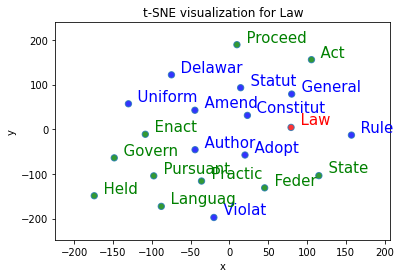

In [ ]:
tsnescatterplot(w2v, 'law',[t[0] for t in w2v.wv.most_similar(positive=["law"], topn=20)][10:])

In [ ]:
pca_df = pd.DataFrame(w2v[w2v.wv.vocab] , index=w2v.wv.vocab)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


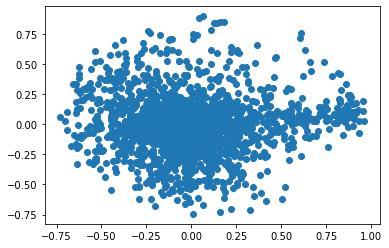

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(pca_df)
plot = plt.scatter(components[:,0], components[:,1])
plt.show()

In [ ]:
import plotly.express as px
fig = px.scatter_matrix(
    components,
    dimensions=range(2),
    color=pca_df.index
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(winedata['target_names']))
plt.show()

## Part 3 - Doc2Vec
Doc2Vec is the same thing as word2vec, but now we're averaging all the word vectors and representing Documents (rather than words) as vectors in a vector space. 

Follow instructions here and stop at "Universal Sentence Encoder": https://github.com/elliottash/nlp_lss_2022/blob/master/notebooks/07_doc_embeddings.ipynb


In [ ]:
from nltk import word_tokenize
docs = []

for i, row in df.iterrows():
    docs += [word_tokenize(row['text'])]
shuffle(docs)

In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
doc_iterator = [TaggedDocument(doc, [i]) for i, doc in enumerate(docs)]
d2v = Doc2Vec(doc_iterator,
                min_count=10, # minimum word count
                window=10,    # window size
                vector_size=100, # size of document vector
                sample=1e-4, 
                negative=5, 
                workers=4, # threads
                #dbow_words = 1 # uncomment to get word vectors too
                max_vocab_size=1000) # max vocab size

In [ ]:
d2v.save('d2v-vectors.pkl')

In [ ]:
# matrix of all document vectors:
D = d2v.docvecs.vectors_docs
D.shape

In [ ]:
# infer vectors for new documents
a = d2v.infer_vector(['the judge on the court'])

b = d2v.infer_vector(['the jury and the judge'])

c = d2v.infer_vector(['cats hunt mice'])

In [ ]:
a.shape, b.shape
print(cosine_similarity(np.expand_dims(a, axis=0), np.expand_dims(b, axis=0)))
print(cosine_similarity(np.expand_dims(a, axis=0), np.expand_dims(c, axis=0)))

In [ ]:
# get all pair-wise document similarities
pairwise_sims = cosine_similarity(D)
pairwise_sims.shape

In [ ]:
# Document clusters
from sklearn.cluster import KMeans

# create 50 clusters of similar documents
num_clusters = 50
kmw = KMeans(n_clusters=num_clusters)
kmw.fit(D)

In [ ]:
# Documents from an example cluster
for i, doc in enumerate(docs):
    if kmw.labels_[i] == 25:
        print(' '.join(doc[:9]))
    if i == 1000:
        break

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3,svd_solver='randomized')
Xpca = pca.fit_transform(D)
pca.explained_variance_ratio_

In [ ]:
#%% PCA Viz
import matplotlib.pyplot as plt

#plt.scatter(Xpca[:,0],Xpca[:,1], alpha=.1)

cdict = {1: 'red', 2: 'blue', 3: 'green'}
fig, ax = plt.subplots()
#for g, label in cdict.items():
for g in np.unique(kmw.labels_):
    ix = np.where(kmw.labels_ == g)
    #ix = np.where(kmw == g)
    #    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
    if g in cdict:
        # use color from cdict
        color = cdict[g]
        ax.scatter(Xpca[:,0][ix], Xpca[:,1][ix], c = color, label = g, s = 100, alpha=0.1)
    else:
        if g < 10:
            color = "black"
            ax.scatter(Xpca[:,0][ix], Xpca[:,1][ix], c = color, label = g, s = 100, alpha=0.01)
    

        
ax.legend()
plt.show()

In [ ]:
# sample 100 texts to show different document embeddings techniques

texts = df["text"][:100]
text = texts[0]
text, texts